In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Удаление дубликатов в данных

In [7]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [8]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [9]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [10]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


<div class="alert alert-block alert-info"> 

если только одно уникальное значение в строке, удали её

</div>   

In [11]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [12]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [13]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [14]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [15]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [16]:
data.dropna()

,0,1,2,3


In [17]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [19]:
data.dropna(axis=1, how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [14]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [15]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-0.216957,NaN,NaN
1,-1.224127,NaN,NaN
2,-0.747537,NaN,-0.229668
3,-1.217201,NaN,-0.289394
4,-0.261792,1.183057,-0.594852
5,-0.254725,0.057802,-0.644869
6,-0.284922,-0.486753,1.095658


In [16]:
df.fillna(0)

,0,1,2
0,-0.216957,0.000000,0.000000
1,-1.224127,0.000000,0.000000
2,-0.747537,0.000000,-0.229668
3,-1.217201,0.000000,-0.289394
4,-0.261792,1.183057,-0.594852
5,-0.254725,0.057802,-0.644869
6,-0.284922,-0.486753,1.095658


In [17]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.216957,0.500000,0.000000
1,-1.224127,0.500000,0.000000
2,-0.747537,0.500000,-0.229668
3,-1.217201,0.500000,-0.289394
4,-0.261792,1.183057,-0.594852
5,-0.254725,0.057802,-0.644869
6,-0.284922,-0.486753,1.095658


In [18]:
df.fillna(method="bfill")

,0,1,2
0,-0.216957,1.183057,-0.229668
1,-1.224127,1.183057,-0.229668
2,-0.747537,1.183057,-0.229668
3,-1.217201,1.183057,-0.289394
4,-0.261792,1.183057,-0.594852
5,-0.254725,0.057802,-0.644869
6,-0.284922,-0.486753,1.095658


In [19]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,-0.216957,NaN,-0.229668
1,-1.224127,NaN,-0.229668
2,-0.747537,1.183057,-0.229668
3,-1.217201,1.183057,-0.289394
4,-0.261792,1.183057,-0.594852
5,-0.254725,0.057802,-0.644869
6,-0.284922,-0.486753,1.095658


In [20]:
df.fillna(data.mean())

,0,1,2
0,-0.216957,6.500000,3.000000
1,-1.224127,6.500000,3.000000
2,-0.747537,6.500000,-0.229668
3,-1.217201,6.500000,-0.289394
4,-0.261792,1.183057,-0.594852
5,-0.254725,0.057802,-0.644869
6,-0.284922,-0.486753,1.095658


In [21]:
df.fillna(data.median())

,0,1,2
0,-0.216957,6.500000,3.000000
1,-1.224127,6.500000,3.000000
2,-0.747537,6.500000,-0.229668
3,-1.217201,6.500000,-0.289394
4,-0.261792,1.183057,-0.594852
5,-0.254725,0.057802,-0.644869
6,-0.284922,-0.486753,1.095658


Медиана более устойчива к выбросам

In [20]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<AxesSubplot:>

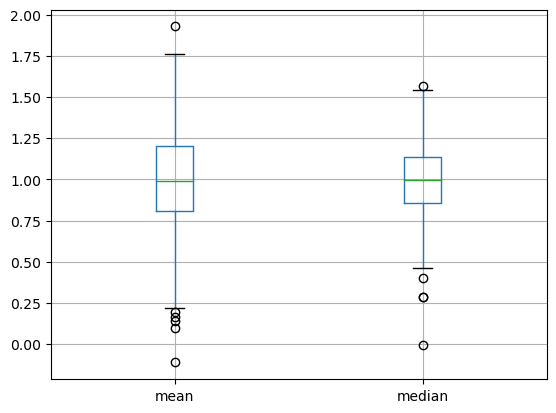

In [21]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [23]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,-0.216957,NaN,NaN,1
1,-1.224127,NaN,NaN,1
2,-0.747537,NaN,-0.229668,0
3,-1.217201,NaN,-0.289394,0
4,-0.261792,1.183057,-0.594852,0
5,-0.254725,0.057802,-0.644869,0
6,-0.284922,-0.486753,1.095658,0


Замена значений

In [24]:
data = pd.Series([1., -999., 2., -999., 4., 3.]) #999- не типичное значение 
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [25]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [22]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [23]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [24]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [25]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [26]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [27]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [28]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [31]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

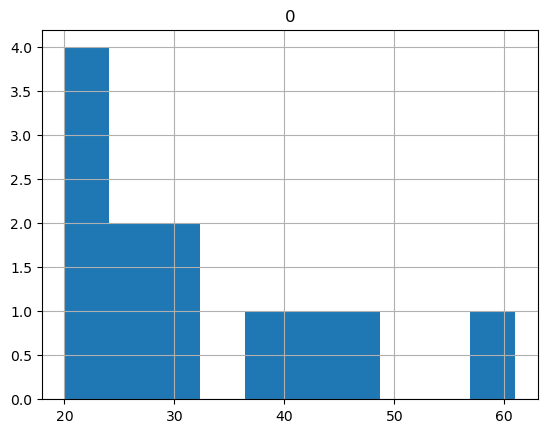

In [32]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [38]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [39]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [34]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

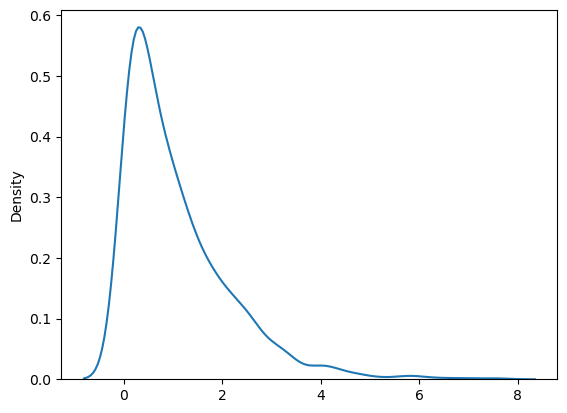

In [35]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

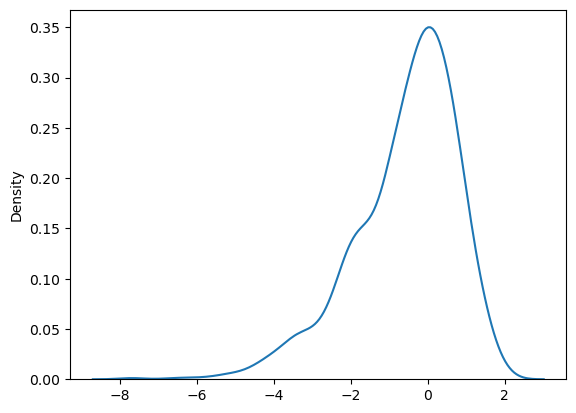

In [43]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

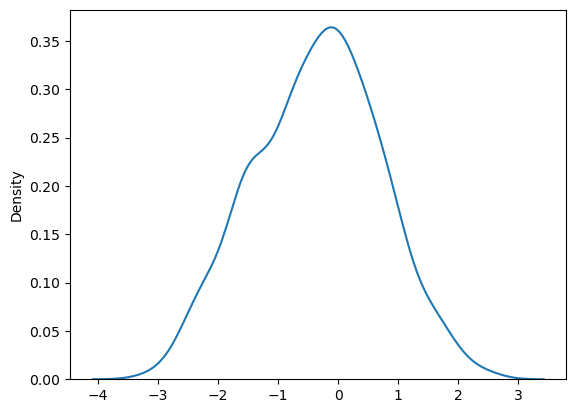

In [44]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

<div class="alert alert-block alert-info">  
    
**метод Бокса-Кокса; максимального правдоподобия**

if x=!0: X^lambda - 1/lambda  

if x=0: lnx
    
</div>   

In [45]:
best_lambda

0.26408857168710714

# Домашнее задание

Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

In [136]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [137]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


## Какие данные имеются:

In [138]:
df.columns

Index(['index', 'back-suspension', 'battery-capacity', 'charge-time',
       'compression', 'consumption-mixed', 'cylinders-order',
       'cylinders-value', 'engine-feeding', 'engine-start', 'engine-stop',
       'engine-type', 'gear-type', 'luxury', 'max-speed', 'power-electro-kw',
       'supply-system', 'valves', 'valvetrain', 'weight',
       'configurations_auto-premiere', 'configurations_back-wheel-base',
       'configurations_front-brake', 'configurations_safety-rating',
       'configurations_seats', 'configurations_tank-volume',
       'supergen_year-stop', 'models_country-from', 'models_group',
       'models_light-and-commercial', 'models_male', 'target'],
      dtype='object')

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

нет нулевых значений

In [42]:
df['back-suspension']

0         9
1         3
2         3
3         0
4         8
         ..
43240     9
43241     3
43242     3
43243     3
43244    10
Name: back-suspension, Length: 43245, dtype: int64

In [43]:
df['battery-capacity'].value_counts()

-1.00     43093
 75.00        9
 27.20        7
 14.10        6
 22.00        6
          ...  
 33.00        1
 64.00        1
 32.60        1
 9.27         1
 71.00        1
Name: battery-capacity, Length: 75, dtype: int64

емкость аккумулятора не может быть -1, удалим столбец

In [44]:
del df['battery-capacity']

In [55]:
df['charge-time'].unique()

array([36457, 44872, 55927, ...,  8958, 20293, 52459])

In [56]:
df['charge-time'].value_counts()

25       6
36       5
28       4
4        3
27       3
        ..
60112    1
52562    1
32764    1
51324    1
52459    1
Name: charge-time, Length: 43212, dtype: int64

In [59]:
df['compression'].value_counts()

-1.0     9320
 10.0    4057
 10.5    3180
 9.5     3018
 9.0     1499
         ... 
 13.4       1
 22.9       1
 6.4        1
 13.2       1
 6.9        1
Name: compression, Length: 188, dtype: int64

In [45]:
df = df[df['compression']!='1.0'].reset_index(drop=True)

In [61]:
df['consumption-mixed'].unique()

array([ 4.3 , -1.  ,  4.2 ,  6.  ,  4.7 , 11.  , 15.8 ,  6.5 ,  9.8 ,
        5.1 , 10.5 ,  8.8 ,  6.6 ,  8.2 ,  5.9 ,  5.7 ,  5.8 ,  5.2 ,
        8.  ,  6.1 ,  8.5 ,  7.8 , 11.9 ,  9.  , 11.7 , 13.  ,  6.7 ,
        8.1 ,  7.5 ,  5.3 ,  7.2 ,  9.3 ,  8.4 ,  9.6 ,  9.4 , 11.4 ,
        4.9 , 14.2 ,  5.  , 13.1 ,  7.9 ,  6.8 ,  4.8 ,  6.2 ,  4.5 ,
        7.7 ,  9.1 , 12.4 ,  7.4 , 18.  , 13.8 ,  7.6 , 11.2 ,  8.3 ,
        6.9 , 11.8 , 10.3 ,  3.6 ,  5.5 ,  7.1 , 11.1 ,  8.7 ,  6.3 ,
        4.1 , 10.7 ,  8.9 , 10.8 , 16.  ,  9.5 , 10.6 ,  9.2 , 10.4 ,
        7.  ,  1.5 ,  9.7 , 11.6 ,  3.9 ,  4.  ,  8.6 , 11.5 ,  5.6 ,
        6.4 , 10.2 , 12.  , 12.8 , 12.3 ,  4.4 , 14.9 ,  9.9 , 15.4 ,
       13.2 ,  5.4 , 10.1 ,  7.3 , 10.  , 16.8 , 15.5 , 12.9 ,  4.6 ,
       13.3 , 14.7 , 12.5 , 17.  ,  2.99, 12.2 , 12.1 ,  3.8 ,  3.3 ,
       17.7 ,  3.4 , 15.2 , 10.9 ,  1.8 , 16.6 , 15.1 , 13.6 ,  3.7 ,
       11.3 , 14.1 ,  3.5 , 14.  , 16.4 , 13.7 , 17.9 , 14.5 , 15.6 ,
       14.8 , 18.1 ,

In [62]:
df = df[df['cylinders-value']!='0'].reset_index(drop=True)

In [63]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
corr_with_target = data.corrwith(df['target'], method='spearman')
corr_matrix = pd.DataFrame(corr_with_target, columns=['Correlation'])

AttributeError: 'numpy.ndarray' object has no attribute 'corrwith'

In [70]:
target_column = df[:, -1]

# Вычисляем корреляцию Спирмена только для последнего столбца
corr_with_target, _ = spearmanr(df[:, :-1], target_column)

# Преобразуем результат в DataFrame для построения тепловой карты
corr_matrix = pd.DataFrame(corr_with_target, columns=['Correlation'])

InvalidIndexError: (slice(None, None, None), -1)

In [144]:
corr_matrix = df.corr(method='spearman')

In [145]:
corr_matrix[['target']]

,target
index,0.002406
back-suspension,-0.182254
battery-capacity,0.029654
charge-time,0.137006
compression,0.103935
consumption-mixed,0.166239
cylinders-value,0.492853
engine-feeding,0.060454
engine-start,0.269032
engine-stop,0.115524


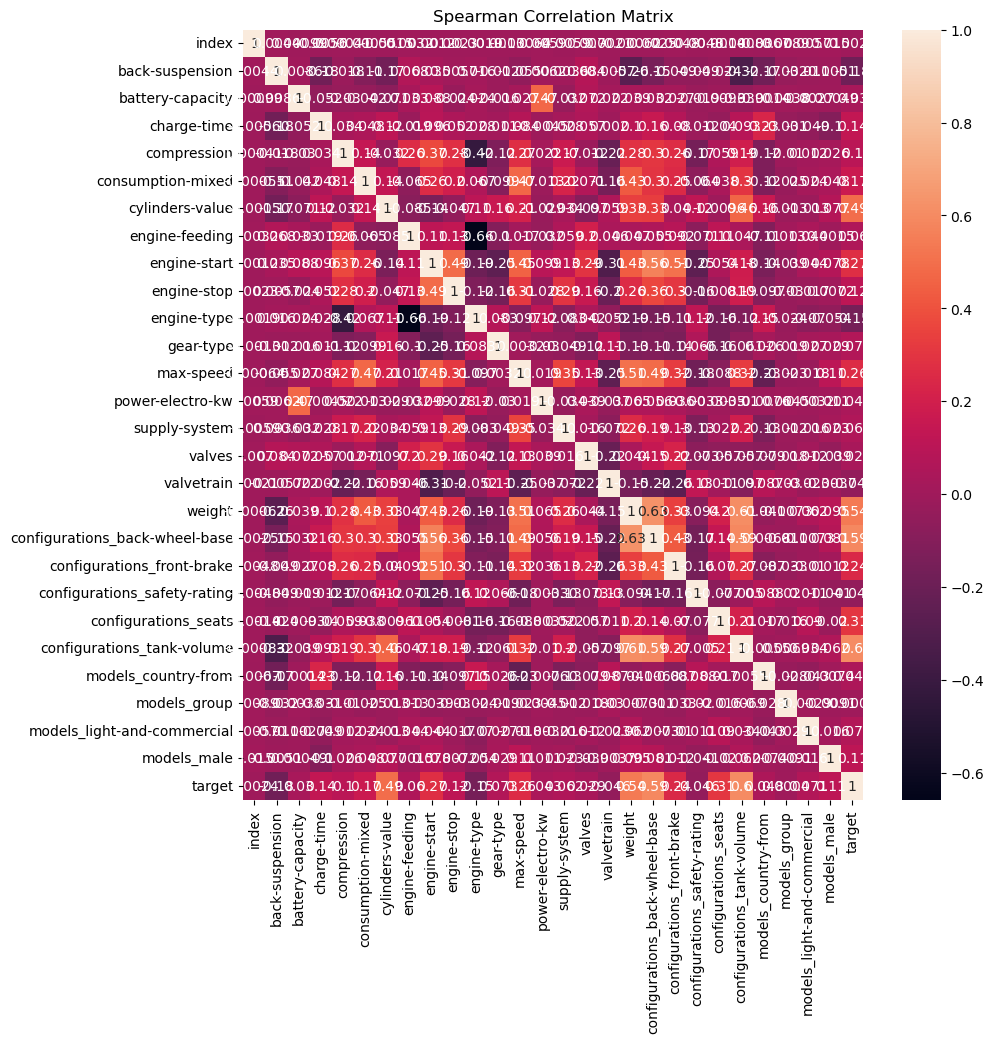

In [146]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Spearman Correlation Matrix')
plt.show()

удалим столбцы с мультиколлинеарностью

In [140]:
del df['luxury']

In [141]:
del df['supergen_year-stop']

In [142]:
del df['configurations_auto-premiere']

In [143]:
del df['cylinders-order']

## Baseline

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [148]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [149]:
reg = LinearRegression().fit(train_X, train_y)

In [150]:
reg.score(train_X, train_y)

0.4551185240860245

In [151]:
mean_squared_error(reg.predict(train_X), train_y)

29863.25822092306

In [152]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [153]:
scores

{'fit_time': array([0.13272214, 0.03873873, 0.03676581]),
 'score_time': array([0.00747037, 0.006953  , 0.00694966]),
 'test_score': array([-29842.98489826, -29620.7079864 , -30366.52548403])}

In [154]:
mean_squared_error(reg.predict(test_X), test_y)

31021.167242628457